# Bee flight simulator
Here we use the modules stone and trialflight to test the capabilites of the physical device. 

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Local imports
import trialflight
import stone
from context import physics
from context import plotter

plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

Method to setup the network with the desired physics. Here the storage time of the gate electrode is indirectly set by the RC constant via Rstore and Cstore. Changes to the activation functions, i.e. the transistor IVs, are made here. 

In [16]:
def setup_network(Rs=2e9, manipulate_shift=False, onset_shift=-0.1,
                  cpu_shift=0.05) :
    
    setup_nw = stone.StoneNetwork() 
    # Setup the internal devices
    devices = {}
    devices['TB1']=physics.Device('../parameters/device_parameters.txt')
    devices['CPU4']=physics.Device('../parameters/device_parameters.txt')
    #devices['CPU4'].set_parameter('Cstore',7e-16) # Original is 0.07 10^-15
    devices['CPU4'].set_parameter('Rstore',Rs) # Original 2e6
    devices['CPU4'].print_parameter('Cstore')
    devices['CPU4'].print_parameter('Rstore')
    print(f'Calculate tau_gate={devices["CPU4"].calc_tau_gate()} ns')
    #setup_nw.weights['TB1->CPU4'].print_W()
    devices['CPU1a']=physics.Device('../parameters/device_parameters.txt')
    devices['CPU1b']=physics.Device('../parameters/device_parameters.txt')
    devices['Pontine']=physics.Device('../parameters/device_parameters.txt')

    if manipulate_shift :
        devices["TB1"].p_dict['Vt'] = onset_shift
        devices["CPU4"].p_dict['Vt'] = cpu_shift
        devices["CPU1a"].p_dict['Vt'] = cpu_shift
        devices["CPU1b"].p_dict['Vt'] = cpu_shift
        devices["Pontine"].p_dict['Vt'] = cpu_shift

    # Feed the devices into the network
    setup_nw.assign_device(devices, unity_key='TB1')
    
    return setup_nw

Create network using the above method. A estimate of the storage time is given.

In [17]:
my_nw = setup_network()

The parameter Cstore=7e-17 F
The parameter Rstore=2000000000.0 Ohm
Calculate tau_gate=336.0 ns


#### Available layouts for network visualization:
**multipartite**: Standard neural network appearance. Hard to see recurrent couplings within layers.  
**circular**: Nodes drawn as a circle  
**shell**: Layers drawn as concetric circles  
**kamada_kawai**: Optimization to minimize weighted internode distance in graph  
**spring**: Force-directed layout which is standard in `networkx`


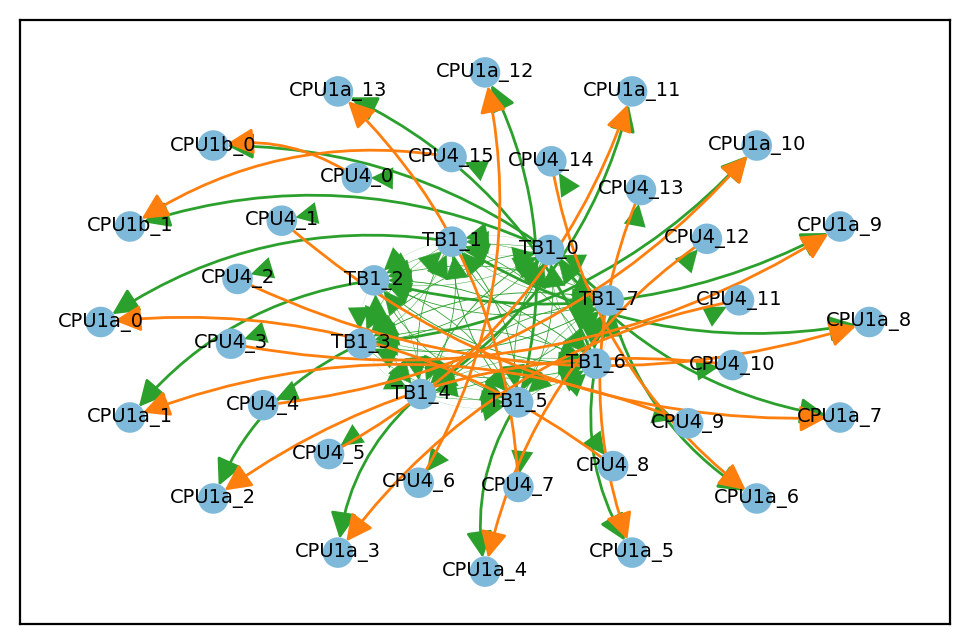

In [5]:
# Draw a shell-structure
shell_pos = my_nw.show_network(layout='shell',shell_order=('TB1','CPU4',['CPU1a','CPU1b']),exclude_layers=['CL1','TN2','Pontine'])

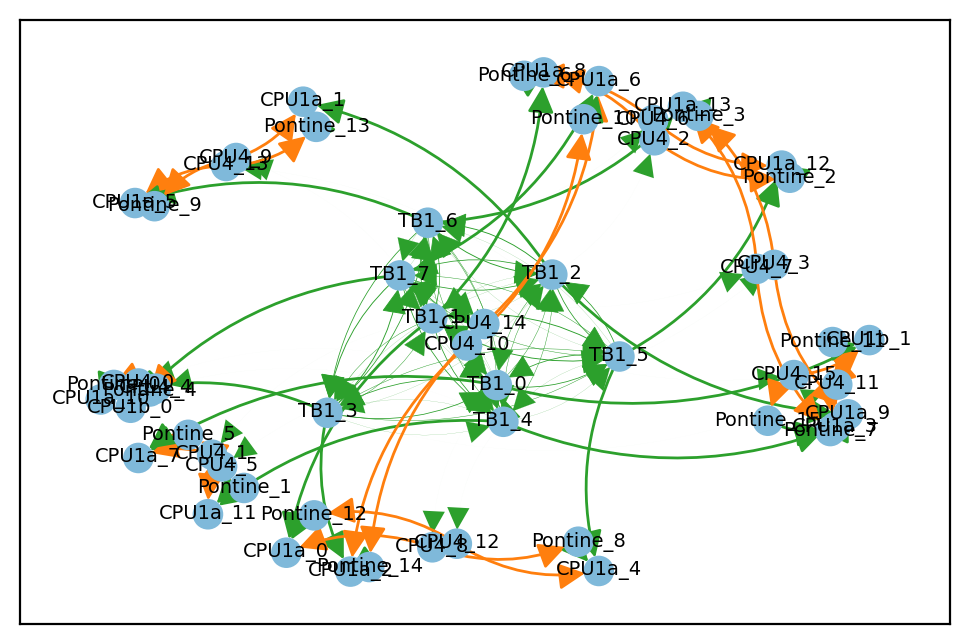

In [5]:
# Including the Pontine cells
spring_pos= my_nw.show_network(exclude_layers=['CL1','TN2'],layout='spring',k=20)

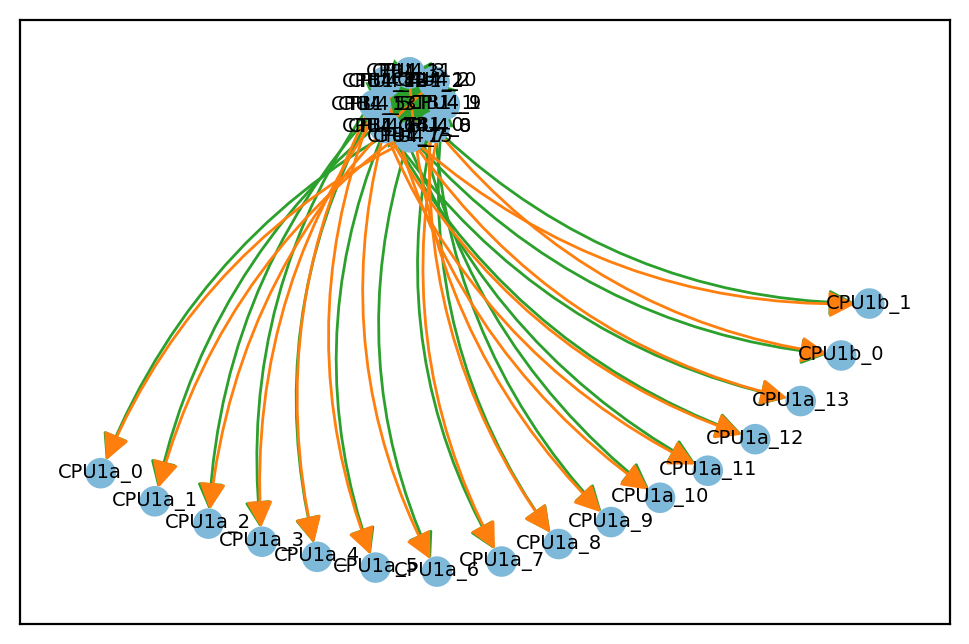

In [8]:
# Yet another version of a drawing
kamada_pos=my_nw.show_network(exclude_layers=['CL1','TN2','Pontine'],layout='kamada_kawai')

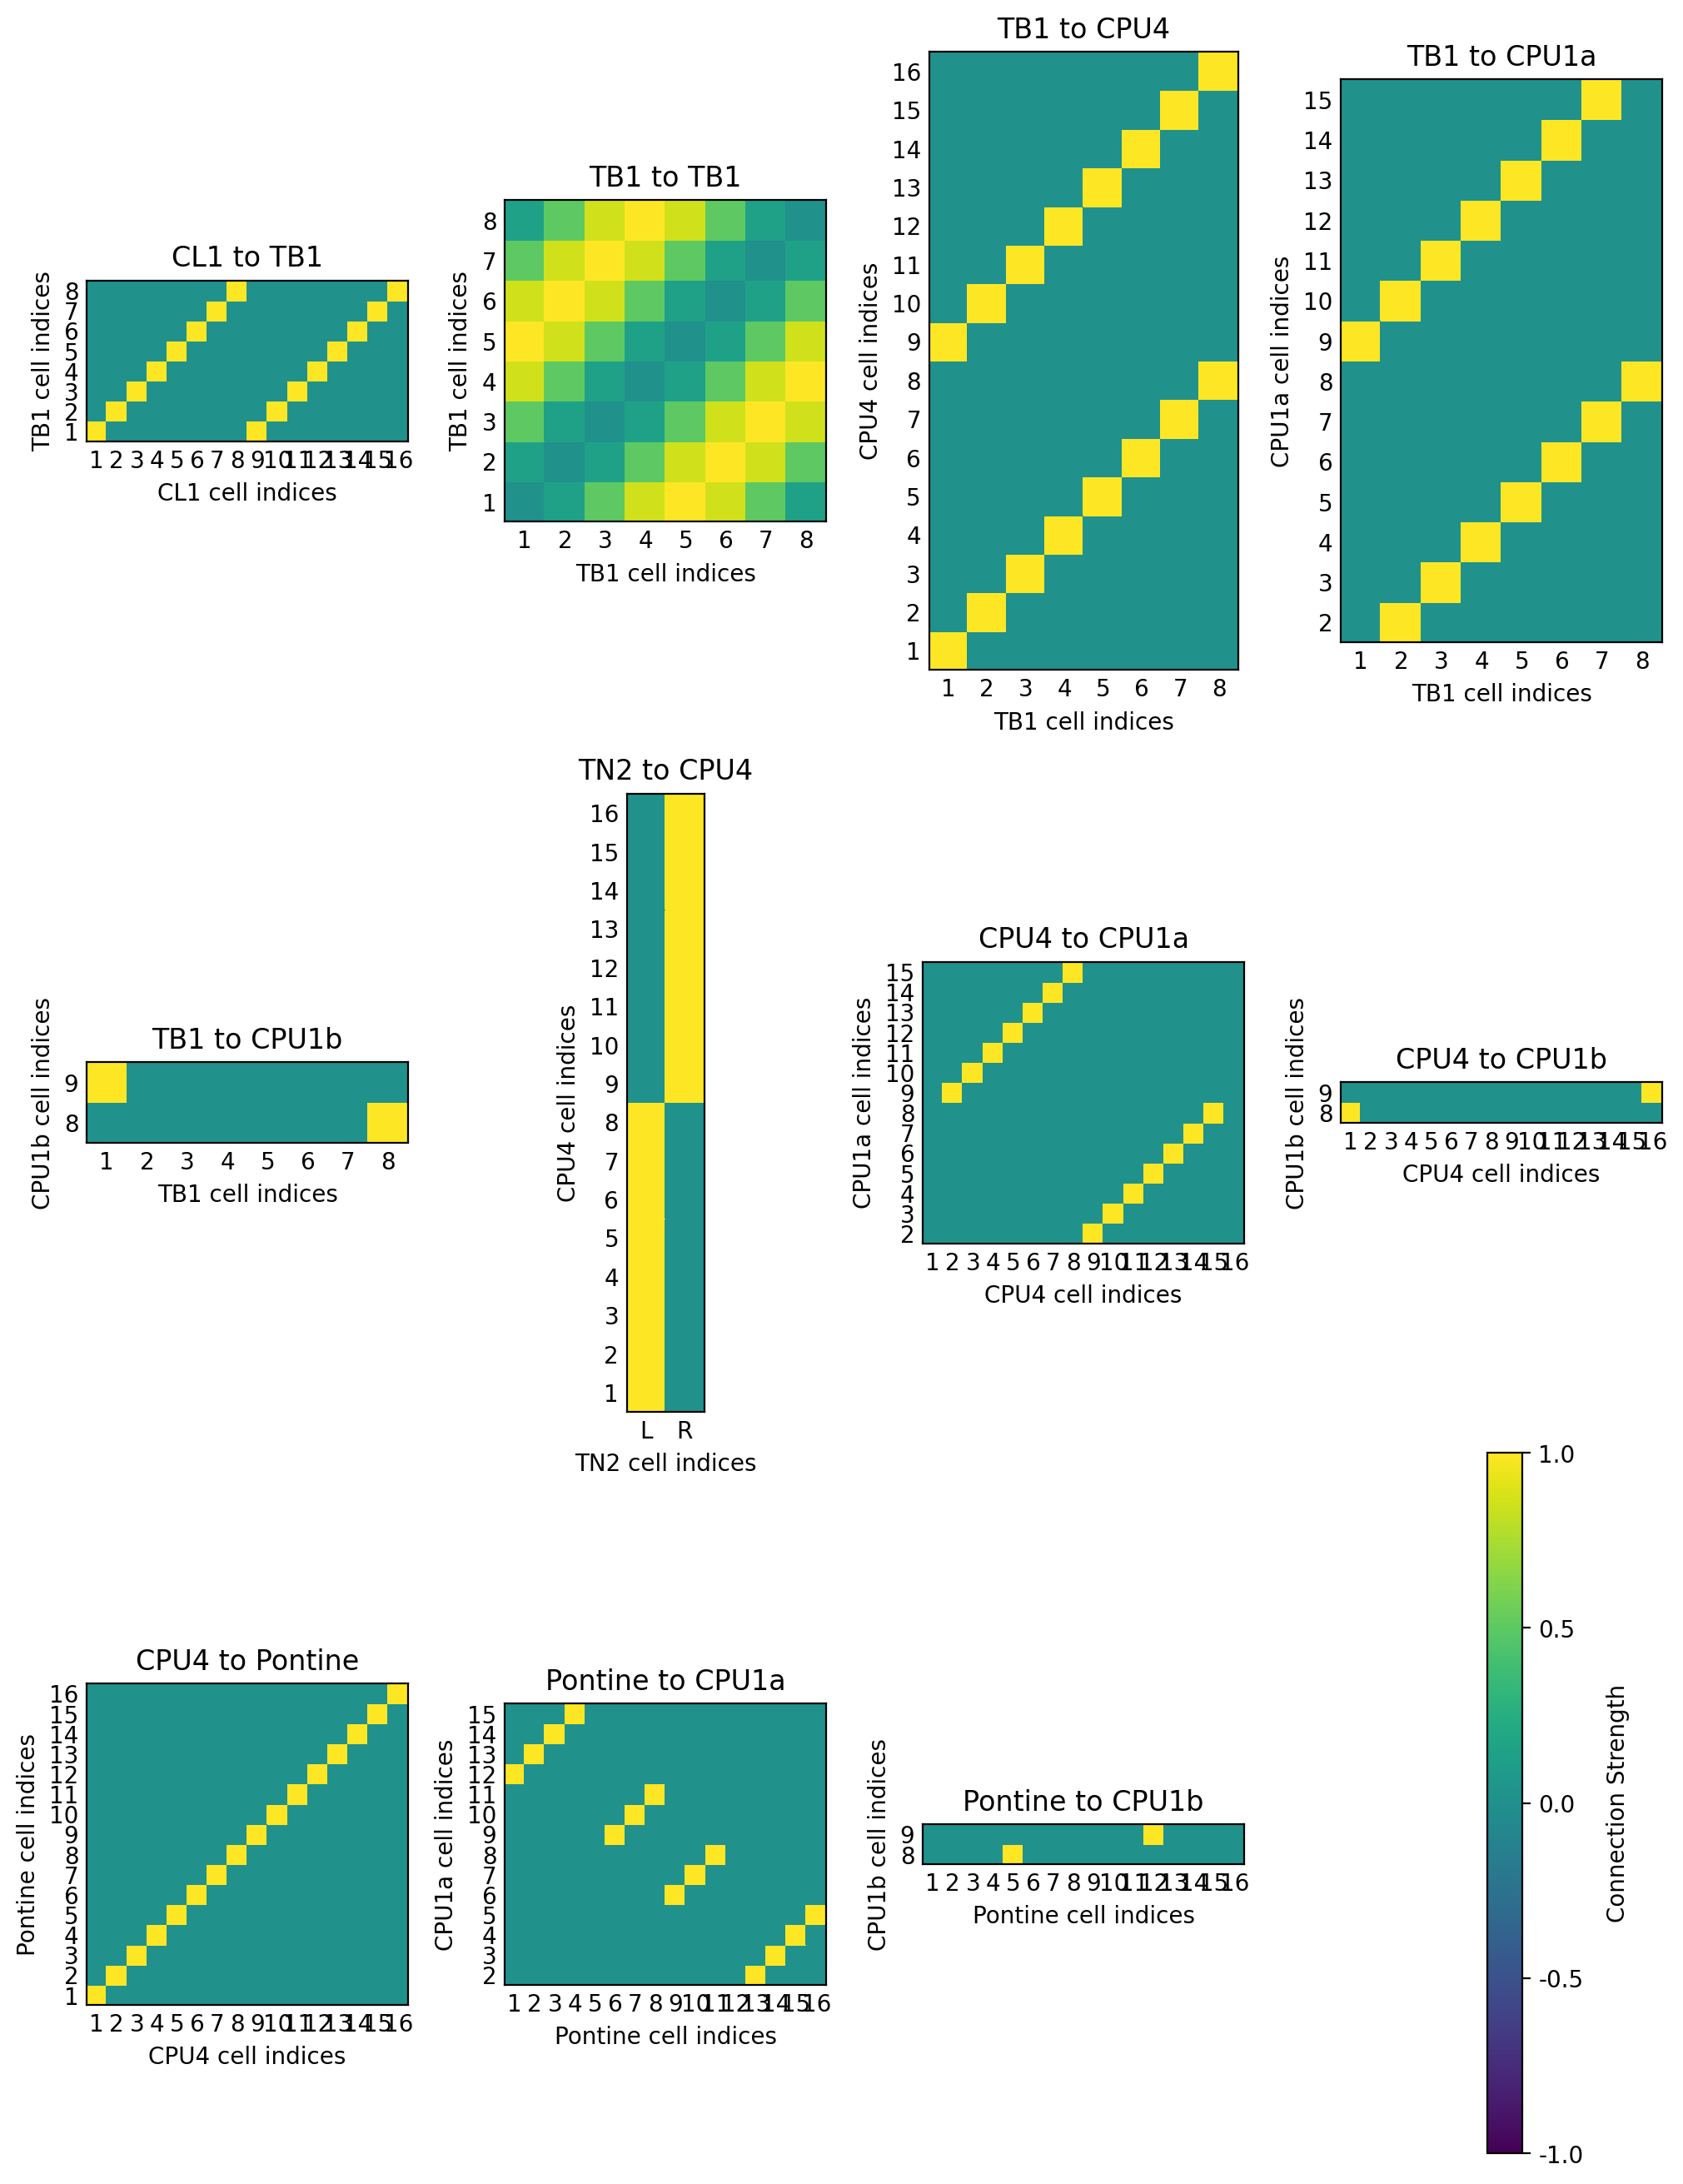

In [6]:
fig, ax = my_nw.show_weights()

Check transistors

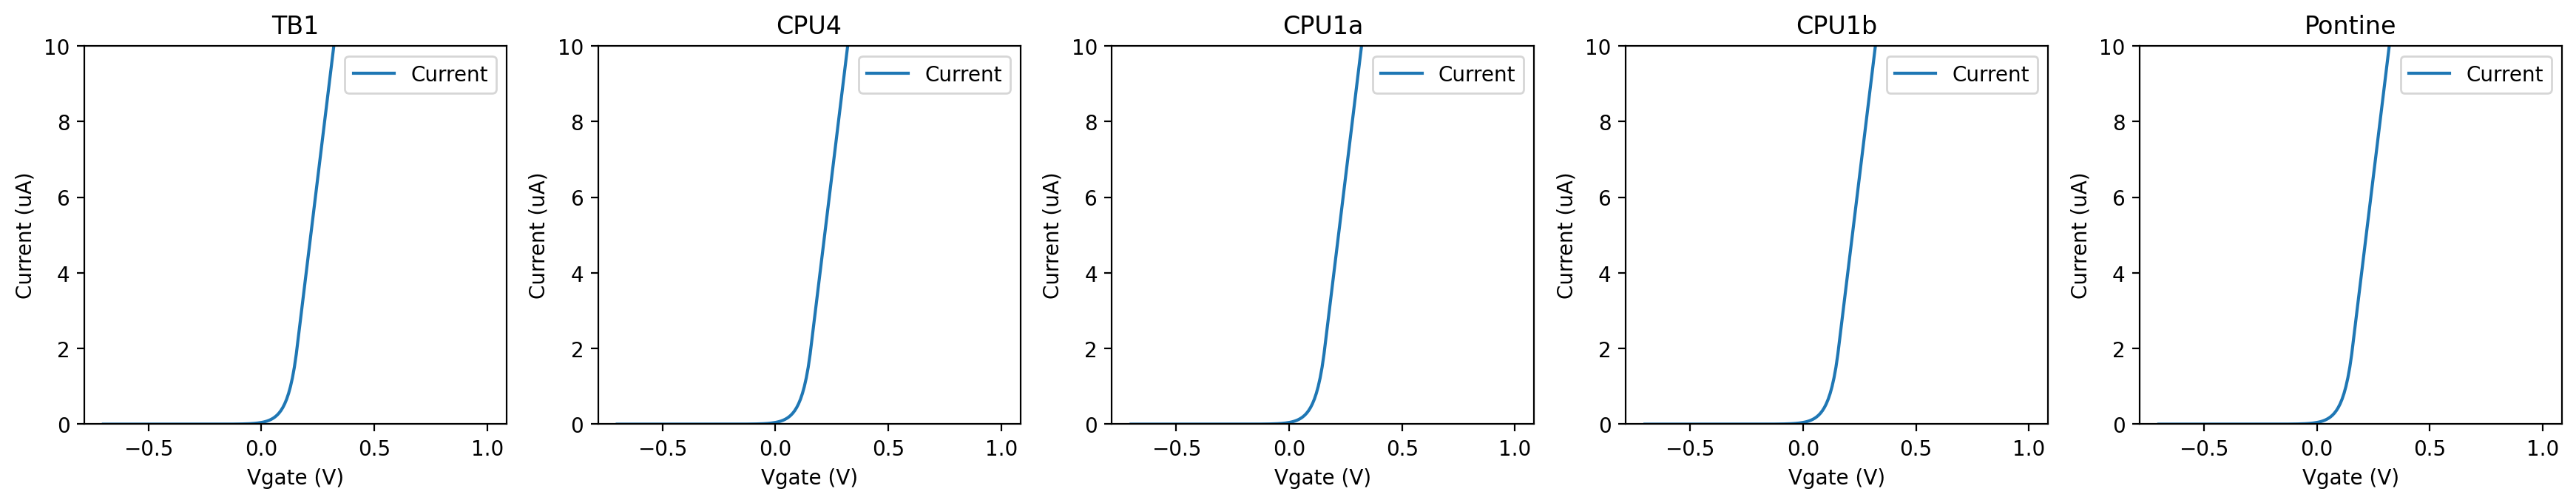

In [7]:
Vleak_dict={}
my_nw.show_devices(Vleak_dict, Vstart=-0.7)

## Running the model
At this point we are all set up to do the evolution. Outbound and inbound flight are simulated after each other to test homing behavior.

In [10]:
Tout=1000
Tinb=1000
out_res, inb_res, out_travel, inb_travel = trialflight.run_trial(my_nw,Tout,Tinb)

Time at t=1.0090160147419136 ns
Time at t=2.023732467792791 ns
Time at t=3.02164891313572 ns
Time at t=4.014739600932939 ns
Time at t=5.025483255054963 ns
Time at t=6.038905902798629 ns
Time at t=7.034950959019528 ns
Time at t=8.034950959019525 ns
Time at t=9.009577965753959 ns
Time at t=10.020721359982314 ns
Time at t=11.054027524091182 ns
Time at t=12.02477994994345 ns
Time at t=13.041954354146302 ns
Time at t=14.011943165188047 ns
Time at t=15.087816922026633 ns
Time at t=16.05015490118791 ns
Time at t=17.043553130627306 ns
Time at t=18.02851749416759 ns
Time at t=19.061219326680938 ns
Time at t=20.054490382138102 ns
Time at t=21.05047930780029 ns
Time at t=22.052016486758507 ns
Time at t=23.00577156672149 ns
Time at t=24.04929307190482 ns
Time at t=25.03871907669649 ns
Time at t=26.004934453641162 ns
Time at t=27.004934453641177 ns
Time at t=28.02349344377292 ns
Time at t=29.040708814282947 ns
Time at t=30.021769350110524 ns
Time at t=31.017166740702955 ns
Time at t=32.057180399550

Time at t=270.0112692552513 ns
Time at t=271.00388491490855 ns
Time at t=272.02718146162016 ns
Time at t=273.0278785001155 ns
Time at t=274.00109998324194 ns
Time at t=275.0282350979053 ns
Time at t=276.0177016485189 ns
Time at t=277.0206417730082 ns
Time at t=278.03975049615684 ns
Time at t=279.0350940862873 ns
Time at t=280.0185224126962 ns
Time at t=281.02243046582885 ns
Time at t=282.023405775856 ns
Time at t=283.0114139737704 ns
Time at t=284.0175951810034 ns
Time at t=285.02998303871726 ns
Time at t=286.0089443535108 ns
Time at t=287.0543621529959 ns
Time at t=288.00975718223776 ns
Time at t=289.02050570875696 ns
Time at t=290.0163623623333 ns
Time at t=291.0212729465827 ns
Time at t=292.0023355126841 ns
Time at t=293.0108573445812 ns
Time at t=294.0066777864995 ns
Time at t=295.0355088310541 ns
Time at t=296.013746020866 ns
Time at t=297.0280130850731 ns
Time at t=298.0375714219518 ns
Time at t=299.0034000275941 ns
Time at t=300.00769072579305 ns
Time at t=301.0052414674553 ns
T

Time at t=533.0092551628461 ns
Time at t=534.0137851304977 ns
Time at t=535.0058447903812 ns
Time at t=536.0117415930356 ns
Time at t=537.0060841925022 ns
Time at t=538.0025434856067 ns
Time at t=539.0137452710599 ns
Time at t=540.0104041295749 ns
Time at t=541.011795714898 ns
Time at t=542.0081802290208 ns
Time at t=543.0121402766083 ns
Time at t=544.0046695348051 ns
Time at t=545.0013357185112 ns
Time at t=546.0009837509322 ns
Time at t=547.0017712715647 ns
Time at t=548.0037945998437 ns
Time at t=549.0075331804104 ns
Time at t=550.0098179974823 ns
Time at t=551.0083055235259 ns
Time at t=552.0041313366727 ns
Time at t=553.0112871151836 ns
Time at t=554.0122705404525 ns
Time at t=555.0087605068364 ns
Time at t=556.0073797458098 ns
Time at t=557.0109676404064 ns
Time at t=558.0050121814372 ns
Time at t=559.0136781777466 ns
Time at t=560.0054334233893 ns
Time at t=561.010472754848 ns
Time at t=562.0017678042142 ns
Time at t=563.0052798819731 ns
Time at t=564.0016351586357 ns
Time at t=

Time at t=801.0140495180774 ns
Time at t=802.0001835338649 ns
Time at t=803.0018509096059 ns
Time at t=804.0139667597563 ns
Time at t=805.0134701284171 ns
Time at t=806.0082387595746 ns
Time at t=807.004625976902 ns
Time at t=808.0044243592167 ns
Time at t=809.0011632269625 ns
Time at t=810.0057398367287 ns
Time at t=811.0041850771464 ns
Time at t=812.0005269224847 ns
Time at t=813.0021001587485 ns
Time at t=814.0102953061153 ns
Time at t=815.0096342569478 ns
Time at t=816.0127605643388 ns
Time at t=817.0005138808 ns
Time at t=818.0145253732625 ns
Time at t=819.0032058529197 ns
Time at t=820.0011064596664 ns
Time at t=821.0079742945612 ns
Time at t=822.0043195457434 ns
Time at t=823.0148715990239 ns
Time at t=824.0083336360948 ns
Time at t=825.0029261751366 ns
Time at t=826.0007180007824 ns
Time at t=827.0107139754678 ns
Time at t=828.0027232769005 ns
Time at t=829.0075665929598 ns
Time at t=830.0086117933128 ns
Time at t=831.0122508008864 ns
Time at t=832.0072451618767 ns
Time at t=83

Time at t=1086.0544850419237 ns
Time at t=1087.0436889824095 ns
Time at t=1088.0325022413897 ns
Time at t=1089.0218105294014 ns
Time at t=1090.0114276789045 ns
Time at t=1091.001073226947 ns
Time at t=1092.0907023670436 ns
Time at t=1093.0811948914263 ns
Time at t=1094.0720589600521 ns
Time at t=1095.063165585268 ns
Time at t=1096.0531434245447 ns
Time at t=1097.0173707437732 ns
Time at t=1098.0428632228322 ns
Time at t=1099.0681653455097 ns
Time at t=1100.0238461674699 ns
Time at t=1101.0892174267103 ns
Time at t=1102.0785117241687 ns
Time at t=1103.0696899748818 ns
Time at t=1104.0600577809407 ns
Time at t=1105.0509422399673 ns
Time at t=1106.0417792781832 ns
Time at t=1107.0320237452684 ns
Time at t=1108.0227614635683 ns
Time at t=1109.0134492356651 ns
Time at t=1110.0035732996218 ns
Time at t=1111.0503242528287 ns
Time at t=1112.0141178279753 ns
Time at t=1113.0453732599008 ns
Time at t=1114.079986357784 ns
Time at t=1115.0578763614296 ns
Time at t=1116.0486428584118 ns
Time at t=1

Time at t=1351.0751641202426 ns
Time at t=1352.0676542584504 ns
Time at t=1353.0654513069674 ns
Time at t=1354.0603383162354 ns
Time at t=1355.0627206983395 ns
Time at t=1356.063145597674 ns
Time at t=1357.0714527495309 ns
Time at t=1358.07802022301 ns
Time at t=1359.09287708717 ns
Time at t=1360.0029378343763 ns
Time at t=1361.014639255231 ns
Time at t=1362.00980580896 ns
Time at t=1363.0049270054396 ns
Time at t=1364.0957482674855 ns
Time at t=1365.0869326259906 ns
Time at t=1366.0772989265706 ns
Time at t=1367.0663751776076 ns
Time at t=1368.056138610777 ns
Time at t=1369.046185657715 ns
Time at t=1370.0366920546223 ns
Time at t=1371.0278510366343 ns
Time at t=1372.0190555339136 ns
Time at t=1373.01092672232 ns
Time at t=1374.0026168101303 ns
Time at t=1375.0571308577396 ns
Time at t=1376.0375114499184 ns
Time at t=1377.0075504276256 ns
Time at t=1378.0553008386798 ns
Time at t=1379.0073692376684 ns
Time at t=1380.0334640141434 ns
Time at t=1381.0620371709342 ns
Time at t=1382.00992

Time at t=1614.076467850917 ns
Time at t=1615.0672501811139 ns
Time at t=1616.0545518809813 ns
Time at t=1617.0446819758333 ns
Time at t=1618.032843282499 ns
Time at t=1619.019873872256 ns
Time at t=1620.0053756177108 ns
Time at t=1621.061457882191 ns
Time at t=1622.0453835769902 ns
Time at t=1623.0060631286724 ns
Time at t=1624.058170157426 ns
Time at t=1625.0488919884576 ns
Time at t=1626.0400835200005 ns
Time at t=1627.0378141319213 ns
Time at t=1628.024487061158 ns
Time at t=1629.0087745993592 ns
Time at t=1630.0954388239056 ns
Time at t=1631.0818536474249 ns
Time at t=1632.0698469982103 ns
Time at t=1633.0580770169825 ns
Time at t=1634.0427359040086 ns
Time at t=1635.0733913523704 ns
Time at t=1636.0560260518262 ns
Time at t=1637.0442871224436 ns
Time at t=1638.03186359969 ns
Time at t=1639.0195588026652 ns
Time at t=1640.0073384018845 ns
Time at t=1641.066415256334 ns
Time at t=1642.0580037039133 ns
Time at t=1643.0452068163695 ns
Time at t=1644.0314214815312 ns
Time at t=1645.01

Time at t=1884.0403339362117 ns
Time at t=1885.0293177401454 ns
Time at t=1886.0159544032524 ns
Time at t=1887.0091388377284 ns
Time at t=1888.0916003295229 ns
Time at t=1889.0792925668036 ns
Time at t=1890.0724587621914 ns
Time at t=1891.0628834051333 ns
Time at t=1892.0581201125174 ns
Time at t=1893.050790562784 ns
Time at t=1894.0469736264004 ns
Time at t=1895.0410892284071 ns
Time at t=1896.0390628739226 ns
Time at t=1897.0336112042492 ns
Time at t=1898.031305202724 ns
Time at t=1899.02521150259 ns
Time at t=1900.0190269779018 ns
Time at t=1901.0098483519375 ns
Time at t=1902.0028518292452 ns
Time at t=1903.052193667738 ns
Time at t=1904.0425784801903 ns
Time at t=1905.0305311103916 ns
Time at t=1906.0187730575929 ns
Time at t=1907.0076334359794 ns
Time at t=1908.0978203884015 ns
Time at t=1909.0873182862292 ns
Time at t=1910.0507719320929 ns
Time at t=1911.0917483318765 ns
Time at t=1912.0814945500142 ns
Time at t=1913.0692459605484 ns
Time at t=1914.0569911135983 ns
Time at t=191

## Analyze the result
First, check the closest position to the nest for the inbound flight. Then make a few plots to illustrate the process.

In [11]:
min_dist, search_width = trialflight.analyze_inbound(inb_travel,Tout,Tinb)

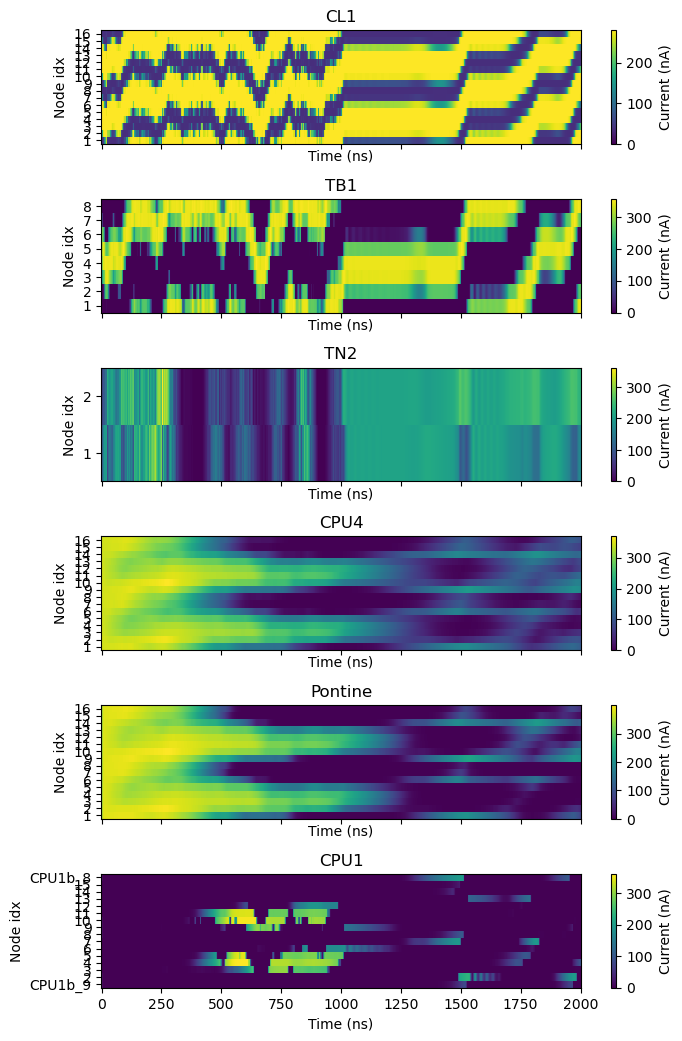

In [12]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning) # get rid of some red text...

plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# 1. Combined trace plot
comb_res = pd.concat([out_res,inb_res],ignore_index=True)
fig,_ = plotter.plot_traces(comb_res, layers=['CL1','TB1','TN2','CPU4','Pontine','CPU1'],attr='Pout',titles=True)

Text(0, 0, 'N')

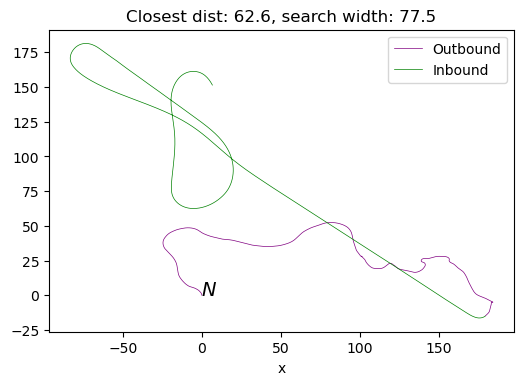

In [13]:
# Plot the combined traveled route
fig, ax = plt.subplots()
out_travel.plot(x='x',y='y',style='purple',ax=ax,linewidth=0.5, label='Outbound')
inb_travel.plot(x='x',y='y',style='g',ax=ax,linewidth=0.5, label='Inbound')
#path_plotter.plot_route(headings, velocity, Tout, 0,ax=ax)
ax.set_title(f'Closest dist: {min_dist:.1f}, search width: {search_width:.1f}')
ax.annotate('N',(0,0),fontstyle='oblique',fontsize=14)

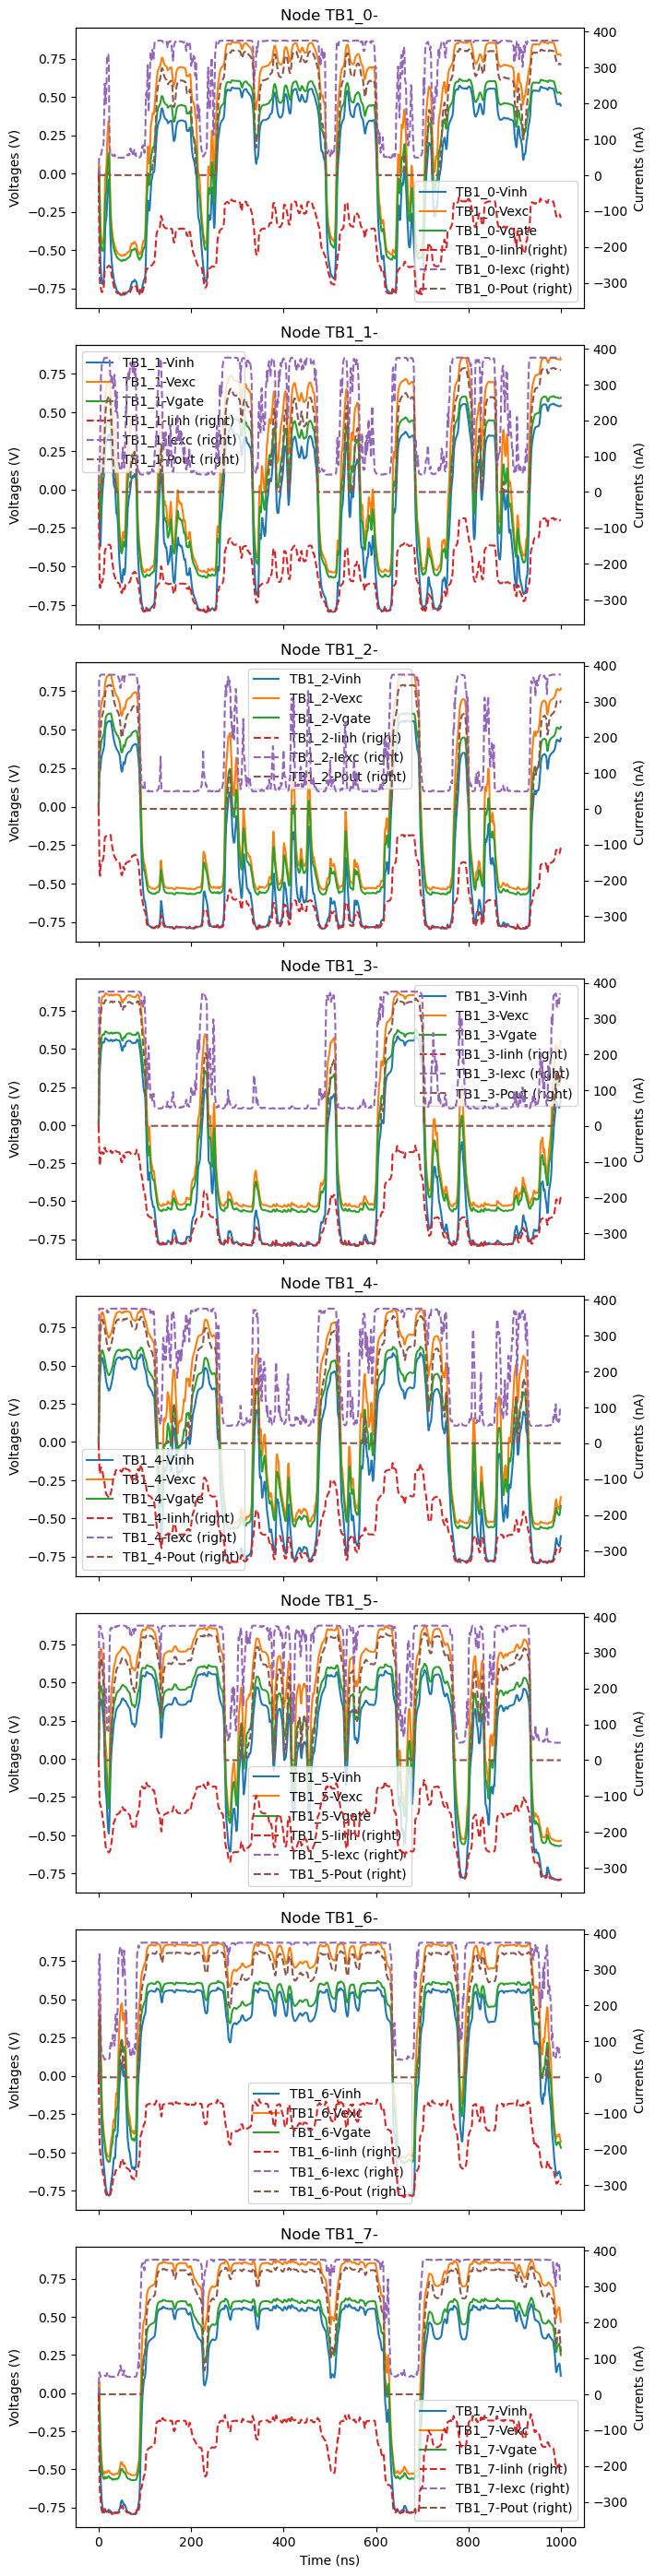

In [14]:
# Specific nodes can be especially studied. 
# When plotting in a notebook, use the onecolumn flag as below.
TB1_list = [f'TB1_{idx}' for idx in range(0,8)]
plotter.plot_nodes(out_res, nodes=TB1_list, onecolumn=True)
#CPU4_list = [f'CPU4_{idx}' for idx in range(0,16)]
#plotter.plot_nodes(out_res, nodes=CPU4_list)

# Plot the heading and motor and velocity
#inb_travel.plot(x='Time',y=['heading','motor'],style='-o')
#inb_travel.plot(x='Time',y=['vx','vy'])